# K-means
K-means is a simple unsupervised learning algorithm that solves the well-known clustering problem. The algorithm identifies $ k $ number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

# What is silhouette score?
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

$$
\begin{align}
s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}
\end{align}
$$
where $ a(i) $ means inter-clustter mean distance, and $ b(i) $ means nearest cluster mean distance.
Then the silhouette score is the mean of the silhouette scores for each sample. The silhouette score is a better measure of cluster validity than the elbow method, for instance, when clusters are of varying sizes and/or non-spherical.

# Elbow method
The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variance as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.


In [9]:
# Importing neccessay libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
sns.set()

In [10]:
class KMeans:
    def __init__(self, n_cluster=2, max_iter=100):
        self.n_cluster = n_cluster      # Number of clusters
        self.max_iter = max_iter        # Maximum number of iterations
        self.n_iter = 0                 # Number of iterations
        self.n_samples = 0              # Number of samples
        self.n_features = 0             # Number of features
        self.labels = None              # Labels of each data point
        self.inertia = 0                # Sum of squared distances of samples to their closest cluster center
        self.data = None                # Data
        self.centroids = None           # Centroids of each cluster
        
        
    def fit(self, data):        # Fit the data where data is a numpy array of shape (n_samples, n_features)
        self.data = data
        self.n_features = data.shape[1]
        self.n_samples = data.shape[0]
        self.labels = np.zeros(data.shape[0])
        if self.centroids is None:
        # Randomly initialize the centroids
            self.centroids = np.zeros((self.n_cluster, self.n_features))
            for i in range(self.n_cluster):
                self.centroids[i] = data[np.random.choice(range(self.n_samples))]
            
        # Iterate until convergence
        for i in range(self.max_iter):
            #  Check first if the number of clusters is greater than the number of data points
            self.n_iter += 1
            self.labels = self.predict(data)
            freq = np.zeros(self.n_cluster)
            flag = False
            for i in range(self.n_cluster):
                freq[i] = np.sum(self.labels == i)   # Count the number of data points in each cluster  
                if freq[i] == 0:
                    self.centroids[i] = data[np.random.choice(range(self.n_samples))]
                    flag = True
                else:
                    self.centroids[i] = self.update_centroids()[i]
            
            if flag:
                # have to take care of the labels
                continue
            
            if self.has_converged():
                self.inertia = self.within_cluster_sum_of_squares()
                break
            
    def predict(self, data):        # Predict the labels of data
        labels = np.zeros(data.shape[0])
        for i in range(data.shape[0]):
            labels[i] = self.closest_centroid(data[i])
        return labels
    
    def update_centroids(self):     # Update the centroids
        centroids = np.zeros((self.n_cluster, self.n_features))
        for i in range(self.n_cluster):
            points = np.array([self.data[j] for j in range(len(self.data)) if self.labels[j] == i])
            if len(points) > 0:
                centroids[i] = np.mean(points, axis=0)
            else :
                centroids[i] = self.data[np.random.choice(range(self.n_samples))]
        return centroids
    
    def closest_centroid(self, sample):      # Find the closest centroid to the sample
        distances = np.zeros(self.n_cluster)
        for i in range(self.n_cluster):
            distances[i] = self.euclidean_distance(sample, self.centroids[i])
        return np.argmin(distances)
    
    def euclidean_distance(self, x1, x2):    # Calculate the euclidean distance between two points
        return np.sqrt(np.sum((x1 - x2)**2))

    def has_converged(self):        # Check if converged
        return np.array_equal(self.centroids, self.update_centroids())
    
    def plot(self):     # Plot the data
        #  10 different colors
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'teal', 'orange', 'purple']
        for i in range(self.n_cluster):
            points = np.array([self.data[j] for j in range(len(self.data)) if self.labels[j] == i])
            plt.scatter(self.centroids[i, 0], self.centroids[i, 1], marker='*', s=200, c=colors[i])
            plt.scatter(points[:, 0], points[:, 1], c=colors[i])
        plt.show()
        
    def within_cluster_sum_of_squares(self):     # Calculate the within cluster sum of squares
        inertia = 0
        for i in range(self.n_cluster):
            points = np.array([self.data[j] for j in range(len(self.data)) if self.labels[j] == i])
            inertia += np.sum(np.square(np.subtract(points, self.centroids[i])))
        return inertia
    
    def get_centroids(self):        # Get the centroids
        return self.centroids
    
    def get_labels(self):       # Get the labels
        return self.labels
    
    def get_n_iter(self):       # Get the number of iterations
        return self.n_iter
    
    def get_inertia(self):      # Get the inertia
        return self.inertia
    
    def get_n_cluster(self):        # Get the number of clusters
        return self.n_cluster
    
    def get_max_iter(self):     # Get the maximum number of iterations
        return self.max_iter
    
    def set_n_cluster(self, n_cluster):     # Set the number of clusters
        self.n_cluster = n_cluster
        
    def set_max_iter(self, max_iter):       # Set the maximum number of iterations
        self.max_iter = max_iter
        
    def set_centroids(self, centroids):     # Set the centroids
        self.centroids = centroids
        
    def set_labels(self, labels):       # Set the labels
        self.labels = labels

In [11]:
class KMeansClassifier:    # KMeans Classifier
    def __init__(self, data, n_cluster=2, max_iter=100):
        self.data = data
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.centroid = None
        self.inertia = float('inf')
        self.kmeans = None
        for i in range(self.max_iter):
            kmeans = KMeans(n_cluster=self.n_cluster, max_iter=self.max_iter)
            kmeans.fit(self.data)
            if kmeans.get_inertia() < self.inertia:
                self.inertia = kmeans.get_inertia()
                self.centroid = kmeans.get_centroids()
                self.kmeans = kmeans
            
    
    def fit(self):      # Fit the data
        self.kmeans.set_centroids(self.centroid)
        self.kmeans.fit(self.data)
        
    def plot(self):     # Plot the data
        self.kmeans.plot()
        
    def get_centroids(self):        # Get the centroids
        return self.centroid
    
    def get_labels(self):       # Get the labels
        return self.kmeans.get_labels()
    
    def get_n_iter(self):       # Get the number of iterations
        return self.kmeans.get_n_iter()

    def get_inertia(self):      # Get the inertia
        return self.inertia
    
    def get_n_cluster(self):        # Get the number of clusters
        return self.n_cluster
    
    def get_max_iter(self):     # Get the maximum number of iterations
        return self.max_iter

In [12]:
dict = {
    'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y':[39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
}

df = pd.DataFrame(dict, columns=['x', 'y'])
data = df.values
# iris = pd.read_csv('Iris.csv')
# data = iris.iloc[:, 1:5].values  



2


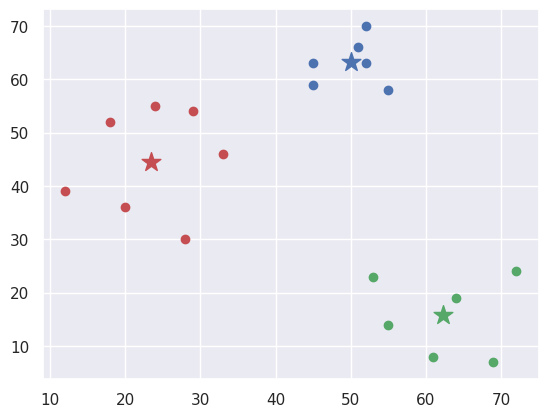

In [13]:
def elbow_method(data, max_cluster=10):     # Elbow method
    inertia = []
    for i in range(1, max_cluster):
        kmeans = KMeansClassifier(data, n_cluster=i, max_iter=300)
        kmeans.fit()
        inertia.append(kmeans.get_inertia())
        
    plt.plot(range(1, max_cluster), inertia)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
kmeans = KMeansClassifier(data, n_cluster=3, max_iter=300)
kmeans.fit()
print(kmeans.get_n_iter())
kmeans.plot()



# def silhouette_method(data, max_cluster=10):     # Silhouette method
#     silhouette = []
#     for i in range(2, max_cluster):
        


### few datasets for KMeans clustering
- [Iris dataset](https://www.kaggle.com/uciml/iris)
- [Mall Customer dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- [Wine dataset](https://www.kaggle.com/brynja/wineuci)
- [Breast Cancer dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
- [Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci)
- [Seeds dataset](https://www.kaggle.com/uciml/seeds-dataset)
- [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads)
- [Bank Note dataset](https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data)
- [Mushroom dataset](https://www.kaggle.com/uciml/mushroom-classification)
- [Titanic dataset](https://www.kaggle.com/c/titanic/data)


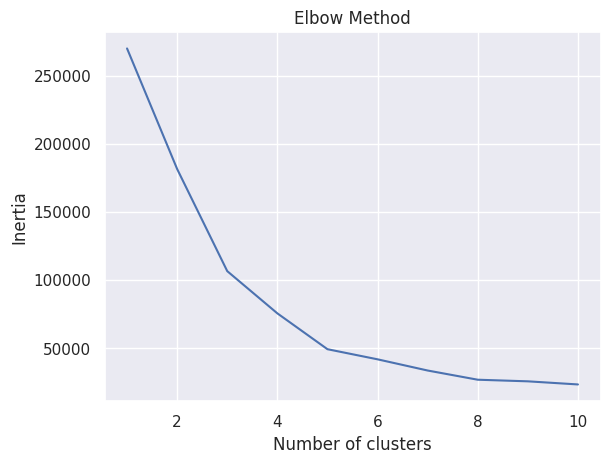

In [14]:
mall_dataset = pd.read_csv('Mall_Customers.csv')
mall_dataset.head()
data = mall_dataset.iloc[:, [3, 4]].values

elbow_method(data, max_cluster=11)
# so the optimal number of clusters is 5

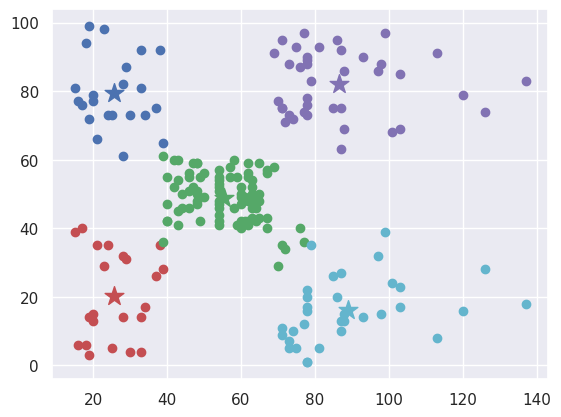

In [20]:
kmeans = KMeansClassifier(data, n_cluster=5, max_iter=300)
kmeans.fit()
kmeans.plot()